In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math as math

In [2]:
T = np.array([
    [22.6,22.2,21.6,21.1,20.6,20.1,18.4,18.1,17.6,17.6,17.6,17.6,17.6,17.6],
    [22.9,22.4,21.9,21.3,20.6,20.3,19.6,18.6,17.6,17.6,17.6,17.6,17.6,17.6],
    [23.1,22.6,22.1,21.5,21,20.5,20,19.1,17.8,17.8,17.8,17.8,17.8,17.8],
    [23.3,22.8,22.3,21.7,21.2,20.7,20.2,19.5,18.3,18.3,18.3,18.3,18.3,18.3],
    [23.6,23,22.4,21.9,21.4,20.9,20.4,19.8,19,19,19,19,19,19],
    [24.2,23.2,22.7,22.1,21.6,21.1,20.6,20,19.5,19.5,19.5,19.5,19.5,19.5],
    [24.2,23.5,22.8,22.3,21.8,21.3,20.8,20.3,19.7,19.7,19.7,19.7,19.7,19.7],
    [24.4,23.7,23.1,22.5,22,21.5,21,20.4,20.1,20.1,20.1,20.1,20.1,20.1],
    [24.8,24,23.3,22.8,22.2,21.7,21.2,20.7,20.2,20.2,20.2,20.2,20.2,20.2],
    [25.2,24.4,23.6,23,22.5,21.9,21.4,20.8,20.4,20.4,20.4,20.4,20.4,20.4],
    [25.8,24.7,23.8,23.2,22.7,22.1,21.6,21.1,20.7,20.7,20.7,20.7,20.7,20.7],
    [26,25.2,24.1,23.5,22.9,22.4,21.8,21.3,20.9,20.9,20.9,20.9,20.9,20.9],
    [26,25.7,24.5,23.7,23.2,22.6,22.1,21.5,21.1,21.1,21.1,21.1,21.1,21.1],
    [26,26,25,24,23.3,22.8,22.3,21.9,21.5,21.5,21.5,21.5,21.5,21.5]
],object)

print(T[5][0])

24.2


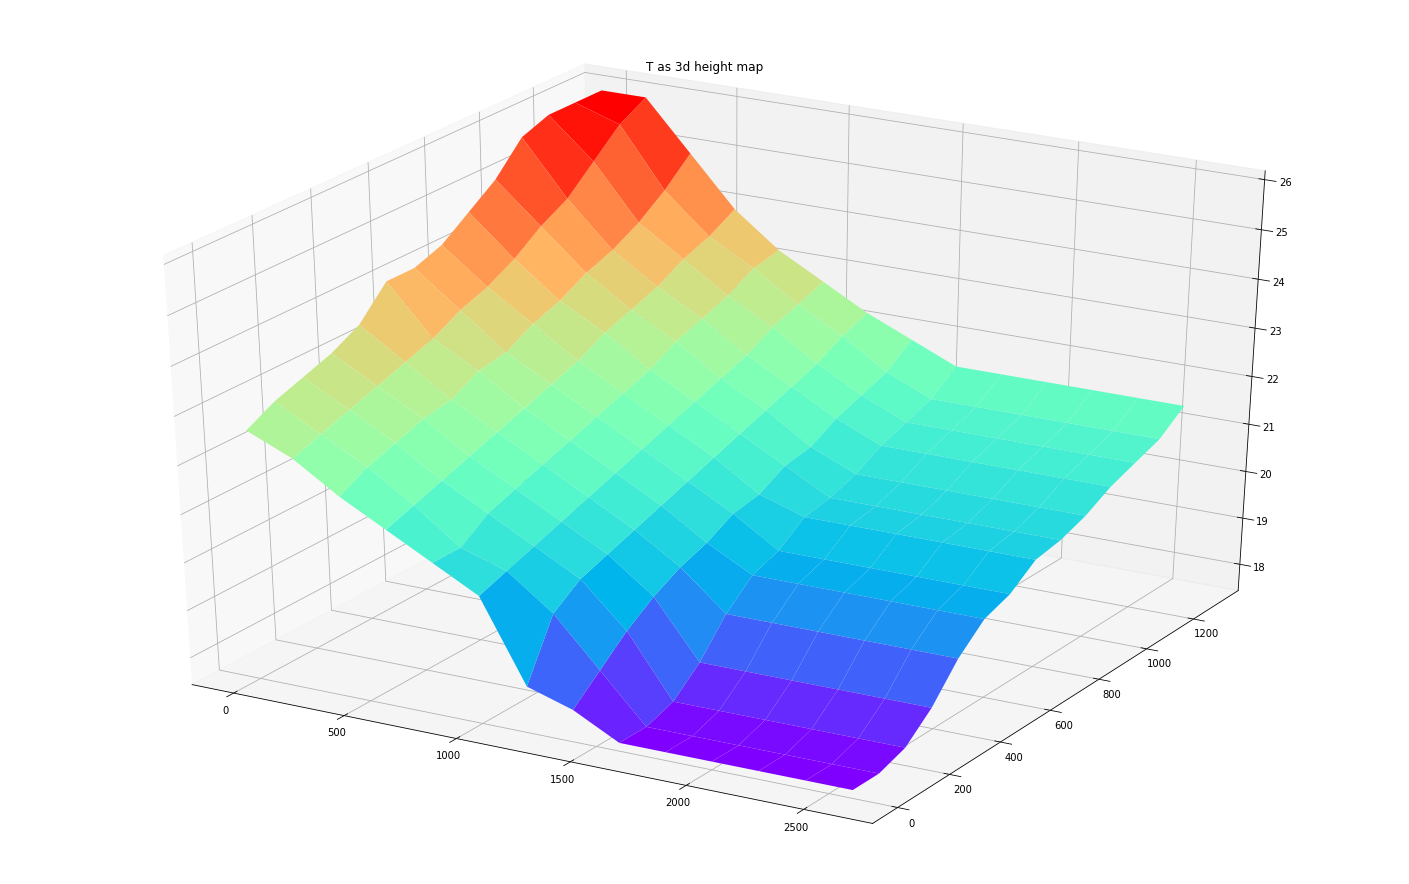

In [3]:
x, y = np.meshgrid(np.linspace(0, 2600, 14), np.linspace(0, 1300, 14))

# show temperature as points in 3d
fig = plt.figure(figsize=(25, 16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, T, cmap='rainbow', edgecolor='none')
plt.title('T as 3d height map')
plt.show()

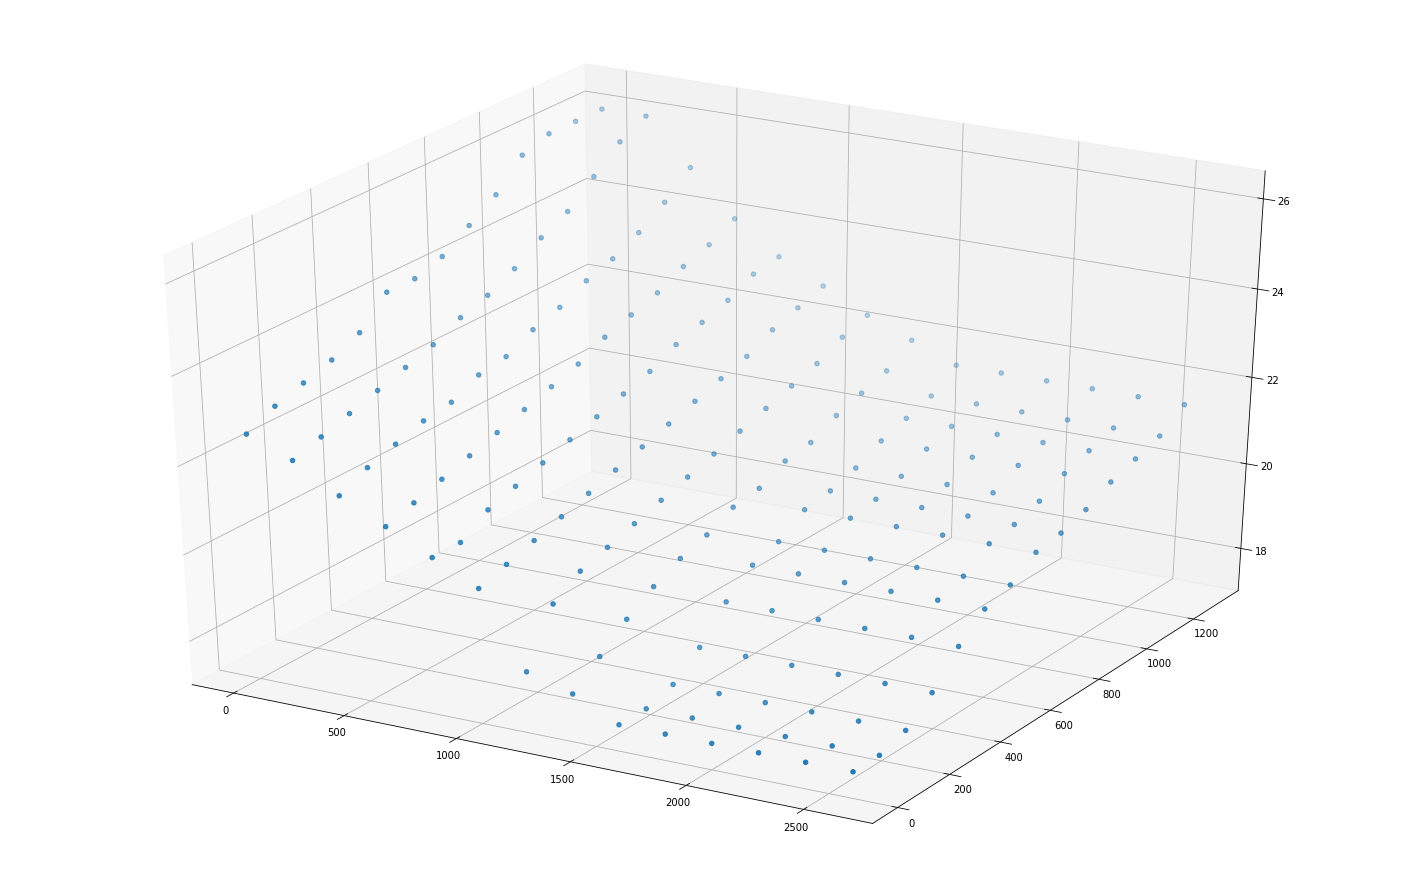

In [4]:
# show temperature as height map in 3d
fig = plt.figure(figsize=(25, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, T);

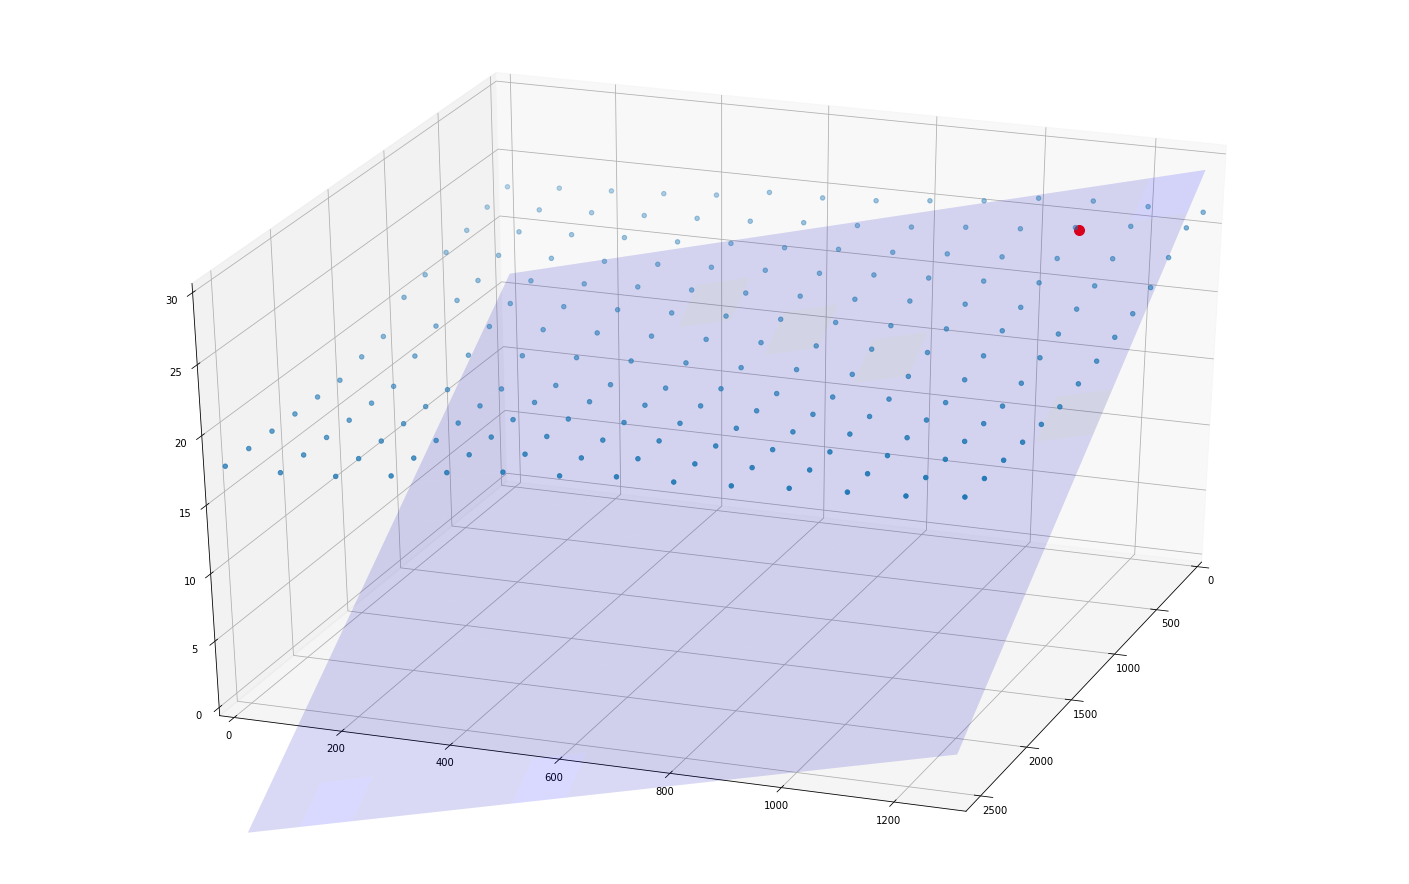

In [53]:
#add a station point and draw the tangential plane from three points or as two vectors
p1 = np.array([190, 1105, 25.2])
p2 = np.array([200, 1105, 25.1]) #data from incremental in x1
p3 = np.array([190, 1095, 25.1]) #data from incremental in x2

# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
normal = np.cross(v1, v2)
a, b, c = normal

# formula for a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. 

# so we have to calculate d from the station point
d = -p1.dot(normal)

# create an x,y mesh for uniform points on the plane
xx, yy = np.meshgrid(np.linspace(0, 2600, 14), np.linspace(0, 1300, 14))

# calculate each corresponding z on plane
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the tangential plane (blue, 15% opacity)
plt3d = plt.figure(figsize=(25, 16)).gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=.15, color='b')

# plot the station location in red
plt3d.plot([190], [1105], [25.2], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10, alpha=1)

# set the view angle (around x axis, around y axis)
plt3d.view_init(30, 20)

plt3d.set_xlim([0, 2600])
plt3d.set_ylim([0, 1300])
plt3d.set_zlim([0, 30])

# plot the data coordinates as points in a surface
plt3d.scatter3D(x, y, T);